# 6.7: Feature Scaling Explained

## 1. Why scale features?
- Many models (k-NN, SVM, KMeans, neural nets, gradient-based optimizers) are sensitive to feature **scale**.
- Scaling prevents features with large magnitudes from dominating distance or gradient calculations.
- Trees (DecisionTree/RandomForest/XGBoost) usually do **not** need scaling for prediction, \
but scaling can still help pipelines and some interpretability workflows.
- Scaling helps models converge more quickly during training.

In [28]:
import numpy as np
import pandas as pd

# matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [29]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [31]:
df = df[['area', 'bedrooms', 'bathrooms', 'stories', 'price']]
df.head()

,area,bedrooms,bathrooms,stories,price
0,7420,4,2,3,13300000
1,8960,4,4,4,12250000
2,9960,3,2,2,12250000
3,7500,4,2,2,12215000
4,7420,4,1,2,11410000


## Feature scaling techniques

Below are common feature-scaling techniques with step-by-step formulas and short notes.

---

## 1. Normalization (Min–Max scaling)
Linear scaling is a good choice when all of the following conditions are met:
- The lower and upper bounds of your data don't change much over time.
- The feature contains few or no outliers, and those outliers aren't extreme.
- The feature is approximately uniformly distributed across its range. \
  That is, a histogram would show roughly even bars for most values.\
**Example:** human age
  
**Steps**
1. Compute $\min(X)$ and $\max(X)$ of the feature.
2. Apply:

$$
x' = \frac{x - \min(X)}{\max(X) - \min(X)}
$$
- Watch out for constant features (division by zero).

**When:** preserves shape, useful for algorithms that need bounded inputs (NNs, k-NN).

---

In [32]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head()

,area,bedrooms,bathrooms,stories,price
0,0.396564,0.6,0.333333,0.666667,1.000000
1,0.502405,0.6,1.000000,1.000000,0.909091
2,0.571134,0.4,0.333333,0.333333,0.909091
3,0.402062,0.6,0.333333,0.333333,0.906061
4,0.396564,0.6,0.000000,0.333333,0.836364


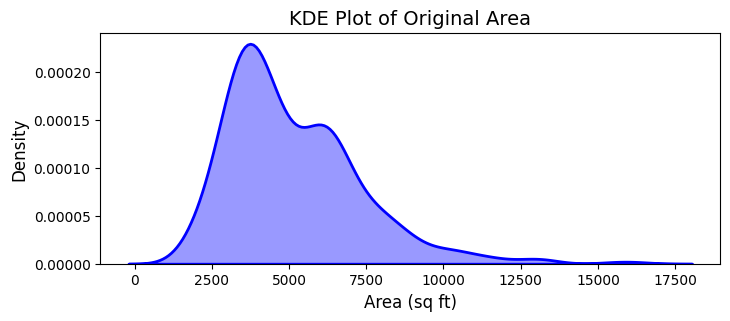

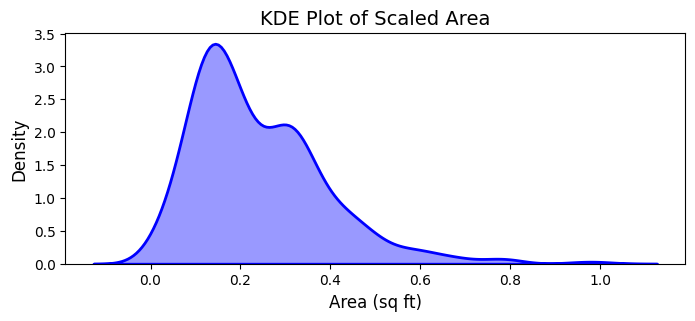

In [34]:
plt.figure(figsize=(8, 3))
sns.kdeplot(df["area"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Original Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

#=====================================

plt.figure(figsize=(8, 3))
sns.kdeplot(scaled_df["area"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Scaled Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

## 2. Standardization (Z-score)
- Z-score is a good choice when the data follows a normal distribution or a distribution somewhat like a normal distribution.
  
**Steps**
1. Compute mean $\mu = \text{mean}(X)$ and standard deviation $\sigma = \text{std}(X)$.
2. Apply:
$$
z = \frac{x - \mu}{\sigma}
$$
- Usually $\sigma$ is the population std (ddof=0) for most libraries.

**When:** centers data to mean 0 and unit variance; good for gradient-based models and many ML algorithms.

---

In [36]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

       area  bedrooms  bathrooms   stories     price
0  1.046726  1.403419   1.421812  1.378217  4.566365
1  1.757010  1.403419   5.405809  2.532024  4.004484
2  2.218232  0.047278   1.421812  0.224410  4.004484
3  1.083624  1.403419   1.421812  0.224410  3.985755
4  1.046726  1.403419  -0.570187  0.224410  3.554979


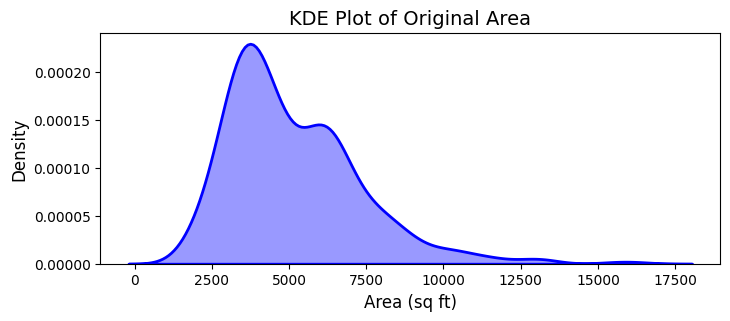

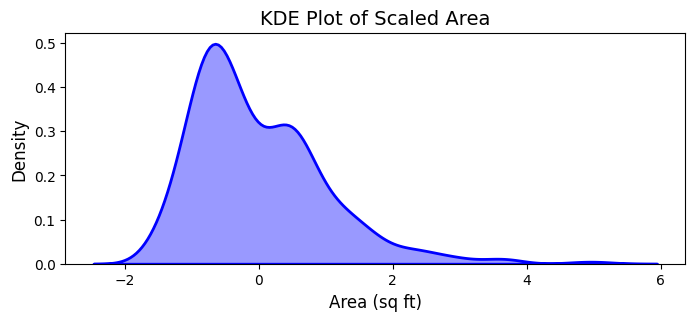

In [37]:
plt.figure(figsize=(8, 3))
sns.kdeplot(df["area"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Original Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

#=====================================

plt.figure(figsize=(8, 3))
sns.kdeplot(scaled_df["area"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Scaled Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

## 3. Robust scaling (median & IQR)
**Steps**
1. Compute median $m$, first quartile $Q_1$, third quartile $Q_3$.
2. IQR $= Q_3 - Q_1$.
3. Apply:
$$
x' = \frac{x - \text{median}(X)}{\text{IQR}(X)}
$$
**When:** robust to outliers (used when data has heavy tails).

---

In [38]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df.columns)
print(scaled_df.head())

       area  bedrooms  bathrooms  stories     price
0  1.021739       1.0        1.0      1.0  3.878788
1  1.579710       1.0        3.0      2.0  3.424242
2  1.942029       0.0        1.0      0.0  3.424242
3  1.050725       1.0        1.0      0.0  3.409091
4  1.021739       1.0        0.0      0.0  3.060606


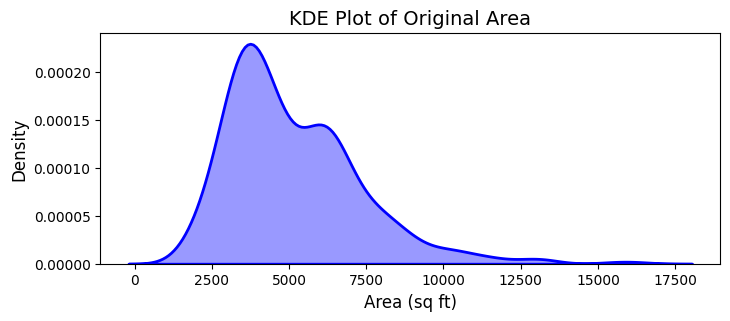

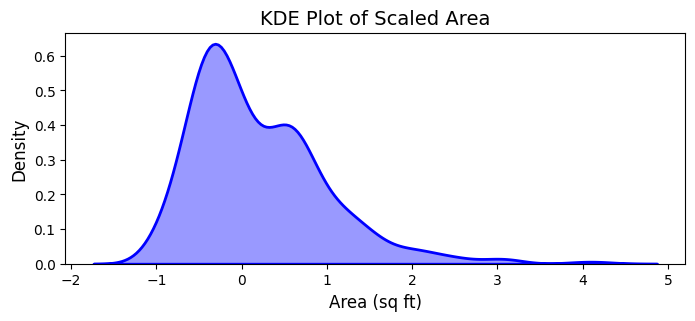

In [39]:
plt.figure(figsize=(8, 3))
sns.kdeplot(df["area"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Original Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

#=====================================

plt.figure(figsize=(8, 3))
sns.kdeplot(scaled_df["area"], fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Scaled Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

**MinMaxScaler vs StandardScaler vs RobustScaler**

| Scaler | Formula | Range | Outlier Sensitivity | Best use case |
|--------|---------|-------|---------------------|---------------|
| **MinMaxScaler** | $(x - \min)/( \max - \min)$ | Fixed $[0, 1]$ | High | NN, k-NN, bounded models |
| **StandardScaler** | $(x - \mu)/\sigma$ | No fixed range (mean=0, std=1) | High | Linear models, PCA |
| **RobustScaler** | $(x - \text{median})/IQR$ | No fixed range | Low | Outlier-heavy data |


## Practical checklist
- **Fit scalers only on training data** → transform validation/test using the fitted parameters (avoid data leakage).
- **Handle zero-variance features** (skip or set constant after scaling).
- **Choose by model**:
  - Tree-based models: scaling generally **not required**.
  - Distance-based or gradient-based models: scaling **important**.
- **Check extreme outliers** — prefer robust scaling or clipping if needed.
---

### Feature Scaling Vs Feature Transformation

| Aspect | Feature Scaling | Feature Transformation |
|--------|----------------|-------------------------|
| **Purpose** | Normalize magnitude | Change distribution shape |
| **Distribution shape** | Unchanged | Altered |
| **Examples** | Min–Max, Standardization, Robust | Log, sqrt, Box–Cox, Yeo–Johnson |
| **When to use** | Distance-based or gradient-based models | Skewed data, non-linear patterns |

---

<div align="center">
      <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250606125317822107/a_normal_distribution1.webp" alt="Sample Image" width="600" height="100"/>
    </div>

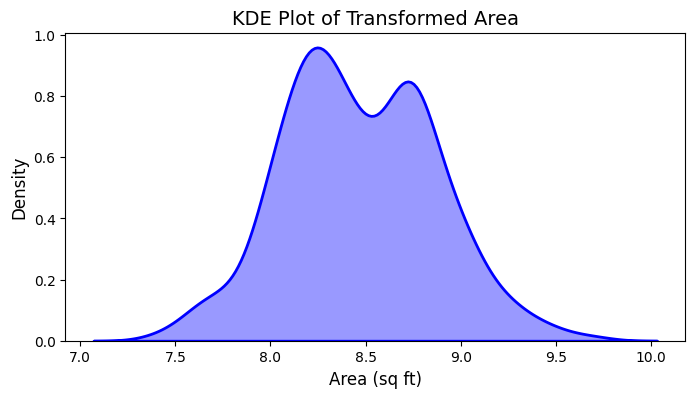

In [27]:
transformed_area = np.log(df["area"])
plt.figure(figsize=(8, 4))
sns.kdeplot(transformed_area, fill=True, color="blue", alpha=0.4, linewidth=2)

plt.title("KDE Plot of Transformed Area", fontsize=14)
plt.xlabel("Area (sq ft)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()